In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
data = pd.read_csv('ibm_data.csv')
data.drop('time_of_intro',
  axis='columns', inplace=True)
data

,year,1_generation,2_generation,familiy_360,famili_370,total
0,1955,190.0,NaN,NaN,NaN,190
1,1956,560.0,NaN,NaN,NaN,560
2,1957,1000.0,NaN,NaN,NaN,1000
3,1958,1680.0,NaN,NaN,NaN,1680
4,1959,2542.0,3.0,NaN,NaN,2545
5,1960,2640.0,880.0,NaN,NaN,3520
6,1961,2350.0,2510.0,NaN,NaN,4860
7,1962,1820.0,4725.0,NaN,NaN,6545
8,1963,1170.0,7720.0,NaN,NaN,8890
9,1964,750.0,10940.0,NaN,NaN,11690


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import solve, Eq, symbols


# starting parameters
def define_Q_and_n(n_=3, Q00=10, Q01=20, Q02=50, Q03=100):
    n = n_
    Q = [Q00, Q01, Q02, Q03]
    return n, Q


def define_parameters(s0=0.1, s1=0.4, s2=0.65, q0=0.2, q1=0.2, q2=0, q3=0,
                      p0=0.5, p1=0.3, p2=0.3, p3=0.9, r0=0.2, r1=0.1, r2=0.05, r3=0.1):
    s = [s0, s1, s2]
    q = [q0, q1, q2, q3]
    p = [p0, p1, p2, p3]
    r = [r0, r1, r2, r3]

    return s, q, p, r


def new_clients(Q, *args):
    srednia = sum(Q) / len(Q)
    srednia = srednia / args[0]
    variance = args[1]
    x, y = symbols('x y')
    eq1 = Eq(srednia - x * y, 0)
    eq2 = Eq(variance - x * y * y, 0)
    sol = solve((eq1, eq2), (x, y))[0]
    return np.random.gamma(sol[0], sol[1])


def define_starting_df(n, Q):
    names = ['Q' + str(i) for i in range(n + 1)]
    df = pd.DataFrame(0, index=np.arange(1), columns=names)
    for j in range(n + 1):
        df.iloc[0, j] = Q[j]
    return df


def next_year(df, df2, n, t, s, q, p, k3, k2):
    row = [0] * (n + 1)
    t = t + 1
    for j in range(n + 1):
        if j != n and j != n - 1:
            row[j] = round(s[j] * df.iloc[t - 1][-(n - j + 1)])
        elif j == n - 1:
            row[j] = round(s[j] * df.iloc[t - 1][-(n - j + 1)])
            for i in range(n + 1):
                row[j] += round(q[i] * df.iloc[t - 1][-n + i - 1])
            row[j] += round(k2)
        elif j == n:
            for i in range(n + 1):
                row[j] += round(p[i] * df.iloc[t - 1][-n + i - 1])
            row[j] += round(k3)
    size = len(df.columns)
    no_zeros = size - (n + 1)
    list_zeros = [0] * no_zeros
    row = list_zeros + row
    df.loc[t] = row

    new_users_1 = 0
    for l in range(n):
        new_users_1 += round(p[l] * df.iloc[t - 1][-n + l - 1])
    new_users_1 += round(k3)
    new_users_2 = 0
    for l in range(n):
        new_users_2 += round(q[l] * df.iloc[t - 1][-n + l - 1])
    new_users_2 += round(k2)
    last_row = df2.loc[t - 1]
    last_row[-1] += new_users_1
    if len(last_row) > 1:
        last_row[-2] += new_users_2
    df2.loc[t] = last_row
    return df, df2, t


def new_generation(df, df2):
    last_name = df.columns[-1]
    number_of_new_gen = str(int(last_name[1:]) + 1)
    new_name = 'Q' + number_of_new_gen
    df[new_name] = 0
    df2[new_name] = 0
    return df, df2


def create_number_of_users_df(n, Q):
    names = ['Q' + str(n)]
    df = pd.DataFrame(0, index=np.arange(1), columns=names)
    df.iloc[0, 0] = Q[n]
    return df


def plot_df(df, title):
    df.plot.line(title=title)

#checks if parameters sum to 1
def check(s, q, p, r):
    for i in range(len(s)):
        if math.isclose(s[i]+q[i]+p[i]+r[i],1):
            continue
        else:
            raise ValueError("ValueError exception thrown")
    return 0
        

In [36]:
import dataframe_image as dfi




def save_df(df, title):
    dfi.export(df,'wykresy/'+ title)

In [37]:
def plot(plot_title, save_title,df=None, df1=None):
    plt.figure(figsize=(15, 10), dpi=80)
    plt.title(plot_title, fontsize=20)
    if df is not None:
        for name, color in slownik1.items():
            plt.plot(years,df[name], label=name, c=color)
    if df1 is not None:
        for name, color in slownik2.items():
            plt.plot(years,df1[name], label=name, c=color)


    plt.legend(loc=2,prop={'size':9})
    plt.savefig('wykresy/'+save_title)

In [38]:
def calculate_rms(df, df1):
    from sklearn.metrics import mean_squared_error


    x = df1['Q4'].fillna(0).cumsum()
    y = df['famili_370'].fillna(0).cumsum()


    rms = np.sqrt(mean_squared_error(x, y))
    rms

In [39]:

if __name__ == '__main__':
    t = 0
    n, Q = define_Q_and_n(n_=3, Q00=0, Q01=49, Q02=4646, Q03=17687)
    # parametry dla roku gdy w poprzednim nie weszła nowa generacja (Moze ktos poprobowac ktore beda dobre)
    s, q, p, r = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.1, p3=0.99, r0=0.45, r1=0.1, r2=0.05, r3=0.01)
    
    check(s,q,p,r)

    # parametry dla roku gdy w poprzednim  weszla nowa generacja
    s_, q_, p_, r_ = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.1, p3=0.99, r0=0.45, r1=0.1, r2=0.05, r3=0.01)
    df1 = define_starting_df(n, Q)
    df2 = create_number_of_users_df(n, Q)
    k3 = new_clients(Q, 20, 5)
    k2 = new_clients(Q, 60, 5)

    df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)
    
    df1, df2 = new_generation(df1, df2)
    
    df1, df2, t = next_year(df1, df2, n, t, s_, q_, p_, k3, k2)
    
    #czas na pojawienei sie kolejnej genracji
    for i in range(7):
        df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)

In [40]:
years = range(1969,1979)
slownik1={'1_generation':'black','2_generation':'green','familiy_360':'darkred','famili_370':'blue'}
slownik2={'Q4':'skyblue','Q3':'lightcoral','Q2':'lime','Q1':'gray'}
df = data.iloc[14:]
save_df(df1,'1_model.png')
save_df(df,'1_real.png')

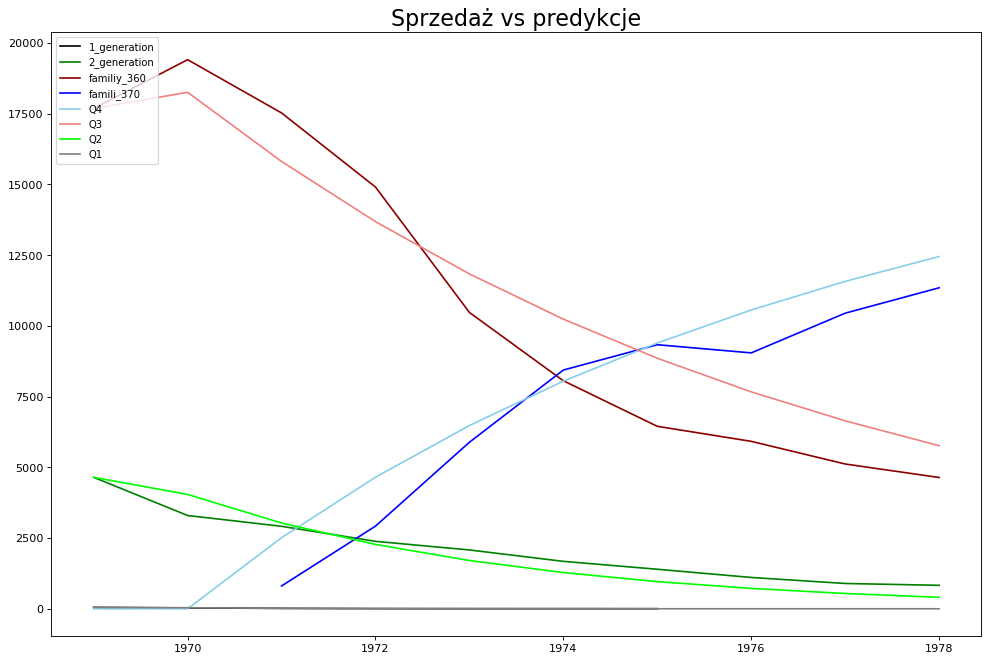

In [41]:
plot("Sprzedaż vs predykcje", 'prediction1_1.png', df, df1)

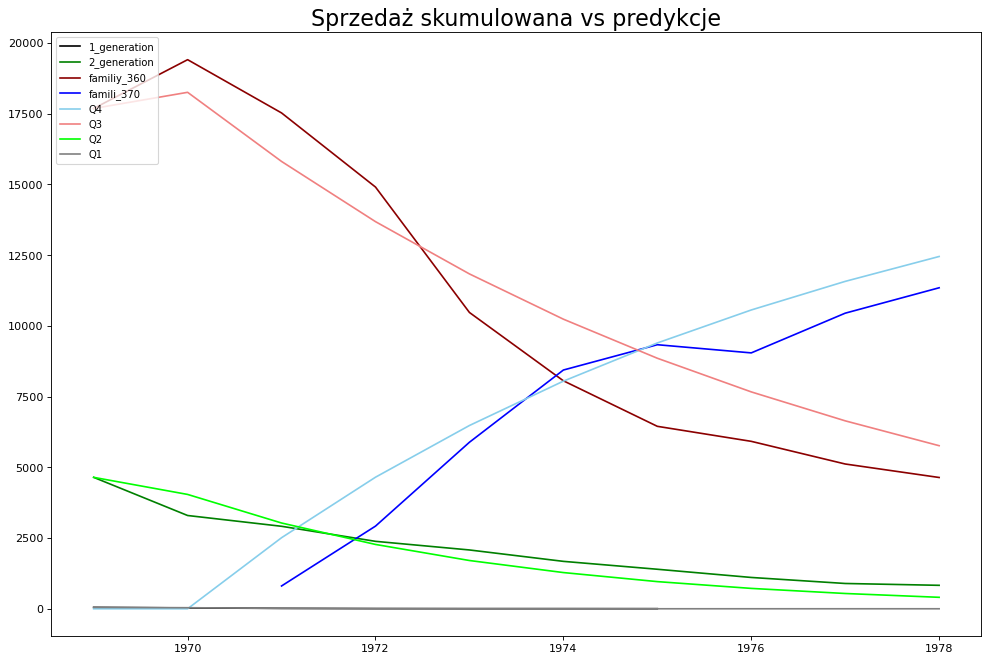

In [42]:
plot("Sprzedaż skumulowana vs predykcje", 'prediction1_2.png',df, df1)

In [43]:
calculate_rms(df, df1)

In [44]:
###Second situation


if __name__ == '__main__':
    t = 0
    n, Q = define_Q_and_n(n_=3, Q00=0, Q01=0, Q02=1170, Q03=7720)
    # parametry dla roku gdy w poprzednim nie weszła nowa generacja (Moze ktos poprobowac ktore beda dobre)
    s, q, p, r = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.1, p3=0.99, r0=0.45, r1=0.1, r2=0.05, r3=0.01)
    
    check(s,q,p,r)

    # parametry dla roku gdy w poprzednim  weszla nowa generacja
    s_, q_, p_, r_ = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.1, p3=0.99, r0=0.45, r1=0.1, r2=0.05, r3=0.01)
    df1 = define_starting_df(n, Q)
    df2 = create_number_of_users_df(n, Q)
    k3 = new_clients(Q, 2, 5)
    k2 = new_clients(Q, 15, 5)

    df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)
    
    df1, df2 = new_generation(df1, df2)
    
    #czas na pojawienei sie kolejnej genracji
    for i in range(6):
        df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)
        
    df1, df2 = new_generation(df1, df2)
    for i in range(8):
        df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)    

df1


,Q0,Q1,Q2,Q3,Q4,Q5
0,0.0,0.0,1170.0,7720.0,0.0,0.0
1,0.0,0.0,1140.0,8873.0,0.0,0.0
2,0.0,0.0,855.0,7745.0,2114.0,0.0
3,0.0,0.0,641.0,6772.0,4066.0,0.0
4,0.0,0.0,481.0,5934.0,5879.0,0.0
5,0.0,0.0,361.0,5214.0,7574.0,0.0
6,0.0,0.0,271.0,4596.0,9168.0,0.0
7,0.0,0.0,203.0,4067.0,10676.0,0.0
8,0.0,0.0,81.0,3050.0,9434.0,2608.0
9,0.0,0.0,32.0,2288.0,8321.0,4951.0


In [45]:
years = range(1963,1979)
slownik1={'1_generation':'black','2_generation':'green','familiy_360':'darkred','famili_370':'blue'}
slownik2={'Q5':'skyblue','Q4':'lightcoral','Q3':'lime','Q2':'gray'}
df = data.iloc[8:]
df
save_df(df1,'2_model.png')
save_df(df,'2_real.png')

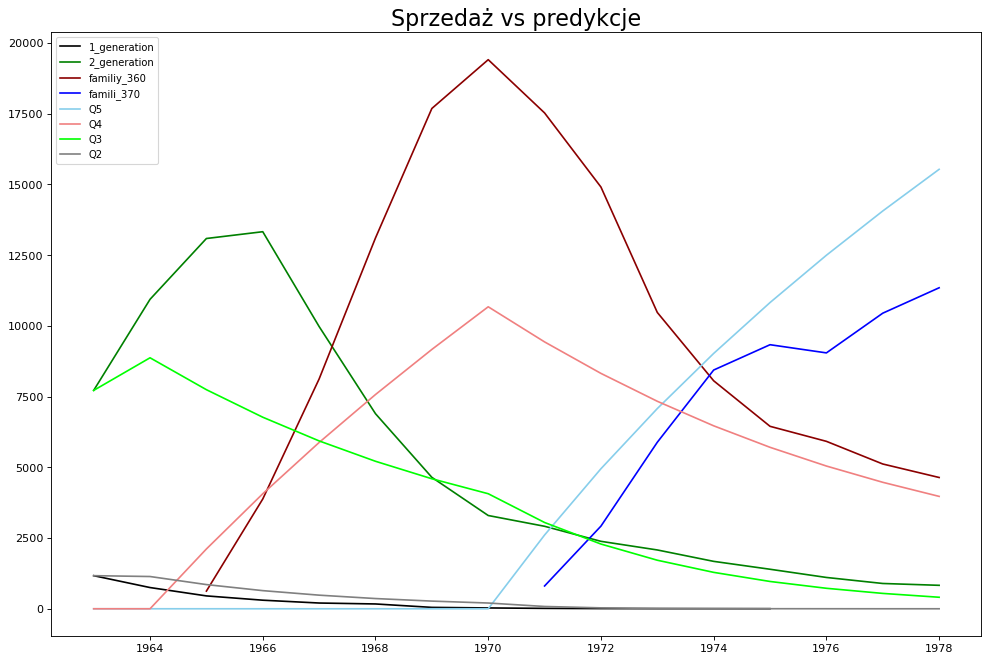

In [46]:
plot("Sprzedaż vs predykcje", 'prediction2_1.png',df, df1)

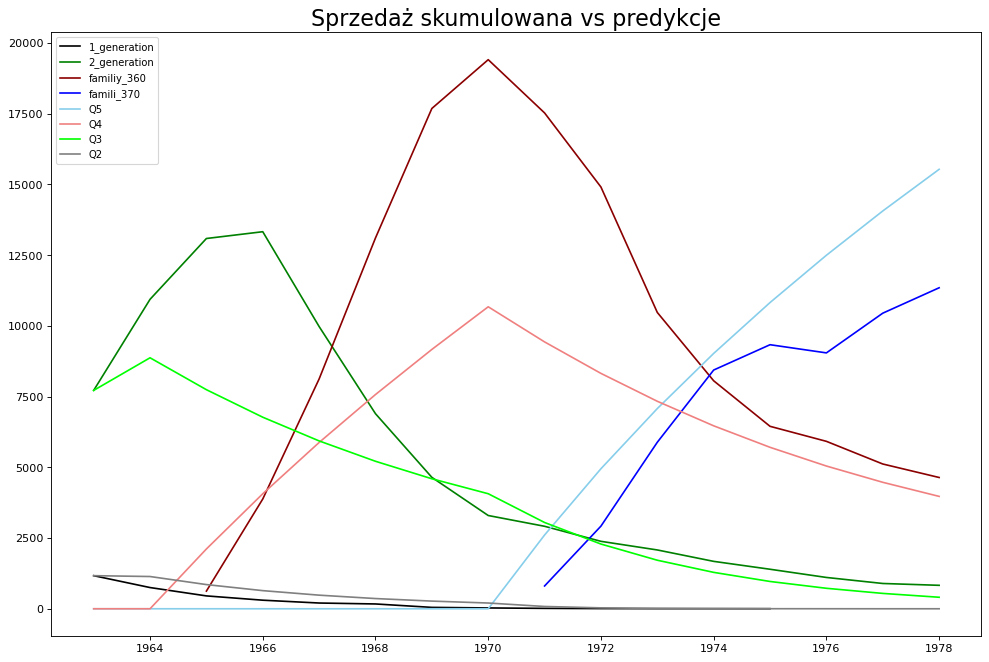

In [47]:
plot("Sprzedaż skumulowana vs predykcje", 'prediction2_2.png',df, df1)

In [48]:
calculate_rms(df, df1)

In [49]:
##Third prediction


###Second situation


if __name__ == '__main__':
    t = 0
    n, Q = define_Q_and_n(n_=3, Q00=150, Q01=500, Q02=5000, Q03=12000)
    # parametry dla roku gdy w poprzednim nie weszła nowa generacja (Moze ktos poprobowac ktore beda dobre)
    s, q, p, r = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.15, p3=0.99, r0=0.45, r1=0.1, r2=0, r3=0.01)
    
    check(s,q,p,r)

    # parametry dla roku gdy w poprzednim  weszla nowa generacja
    s_, q_, p_, r_ = define_parameters(s0=0.4, s1=0.75, s2=0.85, q0=0.05, q1=0.05, q2=0, q3=0,
                      p0=0.1, p1=0.1, p2=0.15, p3=0.99, r0=0.45, r1=0.1, r2=0, r3=0.01)
    df1 = define_starting_df(n, Q)
    df2 = create_number_of_users_df(n, Q)
    k3 = new_clients(Q, 2, 5)
    k2 = new_clients(Q, 10, 5)

    df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)
    
    for z in range(4):
        df1, df2 = new_generation(df1, df2)
        for v in range(2):
            k3 = new_clients(Q, 5, 5)
            k2 = new_clients(Q, 15, 5)
            df1, df2, t = next_year(df1, df2, n, t, s, q, p, k3, k2)
            k3 = new_clients(Q, 5, 5)
            k2 = new_clients(Q, 15, 5)
            df1, df2, t = next_year(df1, df2, n, t, s_, q_,  p_, k3, k2)
df1

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,150.0,500.0,5000.0,12000.0,0.0,0.0,0.0,0.0
1,60.0,375.0,4723.0,14902.0,0.0,0.0,0.0,0.0
2,0.0,150.0,3542.0,13215.0,3631.0,0.0,0.0,0.0
3,0.0,60.0,2656.0,11714.0,6829.0,0.0,0.0,0.0
4,0.0,24.0,1992.0,10384.0,9672.0,0.0,0.0,0.0
5,0.0,10.0,1494.0,9222.0,12218.0,0.0,0.0,0.0
6,0.0,0.0,598.0,6916.0,11218.0,3784.0,0.0,0.0
7,0.0,0.0,239.0,5187.0,10206.0,7062.0,0.0,0.0
8,0.0,0.0,96.0,3890.0,9243.0,9949.0,0.0,0.0
9,0.0,0.0,38.0,2918.0,8349.0,12518.0,0.0,0.0


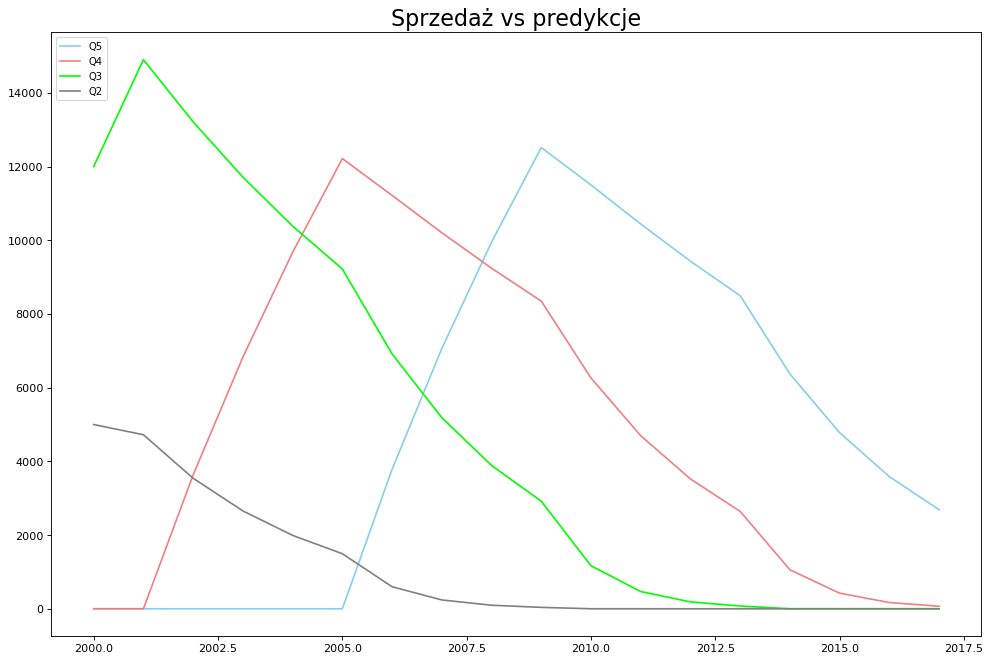

In [52]:
save_df(df1,'3_model.png')
years = range(2000,2018)
plot("Sprzedaż vs predykcje", 'prediction3_1.png',df=None, df1=df1)
plot("Sprzedaż vs predykcje", 'prediction3_1.png',df=None, df1=df2)
